In [42]:
import numpy as np
import random


In [43]:
#details
num_of_jobs=5           #number of jobs
p_time=[3,4,6,10,2]     #processing time of jobs
d_date=[3,10,17,18,15]  #due dates



In [44]:
#randomly initialize the population
population=[]
#lets have our population size to be 10 i.e. there will be 10 individuals in our population
for i in range (10):
    l=np.random.permutation(num_of_jobs)
    l=list(l)
    population.append((l))
print(*population, sep='\n')

[0, 4, 1, 2, 3]
[0, 1, 3, 4, 2]
[4, 1, 3, 2, 0]
[1, 4, 3, 0, 2]
[4, 2, 1, 0, 3]
[4, 2, 0, 1, 3]
[3, 2, 0, 1, 4]
[0, 2, 4, 1, 3]
[2, 4, 3, 1, 0]
[3, 4, 1, 0, 2]


In [45]:
#calculating total lateness
def fitness_func(x):
    c=0
    l=[]
    for i in range (0,len(x)):
        c+=p_time[x[i]]
        lateness=c-d_date[x[i]]
        if lateness>0:
            l.append(lateness)
    return sum(l)

In [46]:
#fitness_func([1, 0, 2, 4, 3],p_time,d_date)
#population
population.sort(key=lambda x: fitness_func(x))
population

[[0, 4, 1, 2, 3],
 [0, 1, 3, 4, 2],
 [0, 2, 4, 1, 3],
 [4, 2, 0, 1, 3],
 [4, 2, 1, 0, 3],
 [1, 4, 3, 0, 2],
 [4, 1, 3, 2, 0],
 [3, 4, 1, 0, 2],
 [2, 4, 3, 1, 0],
 [3, 2, 0, 1, 4]]

In [48]:
def select_parent(population):
    #global parents
    parents=population[0:2]
    #print(parents)
    #print(type(parents))
    return parents
parents=select_parent(population)
parents

[[0, 4, 1, 2, 3], [0, 1, 3, 4, 2]]

In [50]:
def crossover(parents):
    #global parents
    cross_point = random.randint(0,5)
    #print(cross_point)
    offspring=[]
    offspring=offspring+ [(parents[0][0:cross_point +1] +parents[1][cross_point+1:])]
    offspring=offspring+ [(parents[1][0:cross_point +1] +parents[0][cross_point+1:])]
    
    #print(offspring)
    return offspring
offspring=crossover(parents)
offspring

[[0, 4, 1, 4, 2], [0, 1, 3, 2, 3]]

In [58]:
def offspring_repair(offspring):
    for i in range(0,len(offspring)):
        l=[]
        for j in range (0,5):
            if j not in offspring[i]:
                l.append(j)
        for j in range (len(offspring[i])):
            if offspring[i].count(offspring[i][j])>1:
                offspring[i][j]=random.choice(l)
                l.remove(offspring[i][j])
    #print(offspring)
    return offspring
                
offspring=offspring_repair(offspring)
print(offspring)
print(offspring[0][4])

[[0, 3, 1, 4, 2], [0, 1, 4, 2, 3]]
2


In [81]:
def mutation(offspring) :
    #print(parents)
    mute = random.randint(0,49)
    #mute=11
    if 10<=mute<=20 :
        #x=random.randint(0,2)
        y = random.randint(0,4)
        z = random.randint(0,4)
        for i in range (0, len(offspring)):
            
            offspring[i][y],offspring[i][z] = offspring[i][z], offspring[i][y]
    #populations = parents+offspring
    #print(offspring)
    #print(populations)
    return offspring
mutation(offspring)

[[0, 4, 2, 1, 3], [0, 4, 2, 1, 3]]

In [82]:
#fitness_func([0,4,1,3,2])

In [92]:
'''
for i in range (0,10):
    print('simulation'+str(i))
    population.sort(key=lambda x: fitness_func(x))
    parents=select_parent(population)
    offspring=crossover(parents)
    offspring=offspring_repair(offspring)
    new_population=mutation(offspring)
    print(new_population)
    new_population.sort(key=lambda x: fitness_func(x))
    print(fitness_func(new_population[0]))
    
    
'''
s=0
y=[]
while s<50:
    print('simulation'+str(s))
    population.sort(key=lambda x: fitness_func(x))
    parents=select_parent(population)
    offspring=crossover(parents)
    offspring=offspring_repair(offspring)
    new_population=mutation(offspring)
    print(new_population)
    new_population.sort(key=lambda x: fitness_func(x))
    print(fitness_func(new_population[0]))
    population=new_population+parents
    s+=1
    y.append(fitness_func(new_population[0]))
    

simulation0
[[0, 1, 4, 2, 3], [0, 1, 4, 2, 3]]
7
simulation1
[[0, 1, 4, 2, 3], [0, 1, 4, 2, 3]]
7
simulation2
[[0, 1, 4, 2, 3], [0, 1, 4, 2, 3]]
7
simulation3
[[0, 1, 4, 2, 3], [0, 1, 4, 2, 3]]
7
simulation4
[[0, 1, 3, 2, 4], [0, 1, 3, 2, 4]]
16
simulation5
[[0, 1, 4, 2, 3], [0, 1, 4, 2, 3]]
7
simulation6
[[0, 1, 4, 2, 3], [0, 1, 4, 2, 3]]
7
simulation7
[[0, 1, 4, 2, 3], [0, 1, 4, 2, 3]]
7
simulation8
[[0, 1, 4, 2, 3], [0, 1, 4, 2, 3]]
7
simulation9
[[0, 1, 3, 2, 4], [0, 1, 3, 2, 4]]
16
simulation10
[[0, 1, 4, 2, 3], [0, 1, 4, 2, 3]]
7
simulation11
[[0, 1, 4, 2, 3], [0, 1, 4, 2, 3]]
7
simulation12
[[0, 1, 4, 2, 3], [0, 1, 4, 2, 3]]
7
simulation13
[[0, 1, 4, 2, 3], [0, 1, 4, 2, 3]]
7
simulation14
[[0, 1, 4, 2, 3], [0, 1, 4, 2, 3]]
7
simulation15
[[0, 1, 4, 2, 3], [0, 1, 4, 2, 3]]
7
simulation16
[[0, 1, 4, 2, 3], [0, 1, 4, 2, 3]]
7
simulation17
[[0, 1, 4, 2, 3], [0, 1, 4, 2, 3]]
7
simulation18
[[0, 1, 4, 2, 3], [0, 1, 4, 2, 3]]
7
simulation19
[[0, 1, 4, 2, 3], [0, 1, 4, 2, 3]]
7
simulati

visualizing simulation

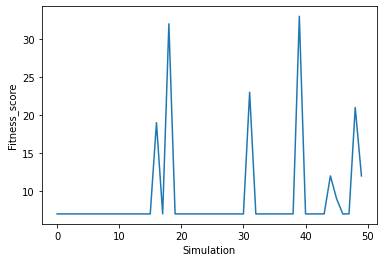

In [90]:
x=list(range(s))
import matplotlib.pyplot as plt
plt.plot(x,y)
plt.xlabel('Simulation')
plt.ylabel('Fitness_score')
plt.show()

After running the simulation for 50 times, the most optimal order sequence is (0,1,4,2,3) with fitness score of 7